# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random # 톰슨 샘플링에 필요함
N = 10000
d = 10
ads_selected = [] # 라운드를 거치며 선택될 모든 광고의 리스트
#여기서부터 UCB 알고리즘과 다름
numbers_of_rewards_1 = [0] * d  # 라운드 n까지 광고 i가 보상으로 1을 얻은 횟수
numbers_of_rewards_0 = [0] * d  # 라운드 n까지 광고 i가 보상으로 0을 얻은 횟수
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0 # 가장 높은 draw를 가진 광고를 선택하기 위해 필요한 변수(초기값 0으로 설정)
    for i in range(0, d): # 베타 분포에서 무작위 draw를 얻는 과정
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1) # 두 파라미터의 분포로부터 무작위 draw를 가져옴( 광고 i의 베타분포에서 온 무작위 draw)
        if (random_beta > max_random): # 각 광고의 다른 베타 분포에서 이루어진 모든 무작위 draw 중
            max_random = random_beta   # 가장 높은 무작위 draw를 가진 광고를 선택
            ad = i # 더 높은 무작위 베타를 가져온다면 이 광고도 업데이트 되야 하기 때문.
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
         numbers_of_rewards_1[ad] += 1
    else:
         numbers_of_rewards_0[ad] += 1
    total_reward += reward

## Visualising the results - Histogram

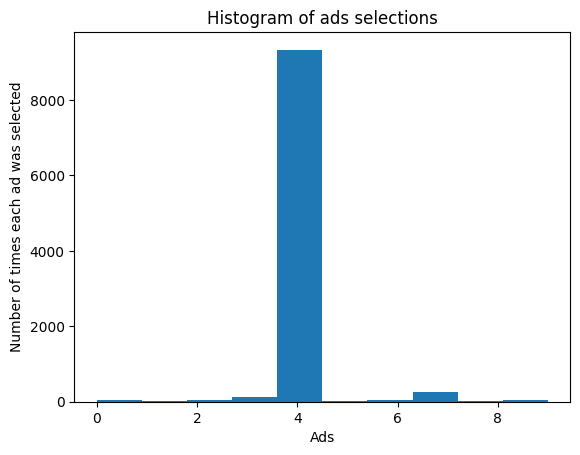

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [5]:
# 대부분의 상황에서 톰슨 샘플링이 UCB보다 강함.